# Credit Card Fraud Detection - Julia

* SMOTE is used for handle the extreme class imbalance.
* XGBoost is used for training the fraud detection classifier.
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
# Add packages
# using Pkg
# Pkg.add("CSV")
# Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


## Load Dataset

In [1]:
using CSV
using DataFrames


data_dir = "data/creditcard.csv"
df = DataFrame(CSV.File(data_dir))
println(size(df))

ENV["COLUMNS"] = 500
# first(df, 10)
# show(df[1:5, :], allcols = true)
df[1:5, :]

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
2,0.0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
3,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
4,1.0,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
5,2.0,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [2]:
Base.displaysize() = (31, 31)
missing_vals = describe(df, :nmissing, length => :length)
missing_vals

,variable,nmissing,length
,Symbol,Int64,Int64
1,Time,0,284807
2,V1,0,284807
3,V2,0,284807
4,V3,0,284807
5,V4,0,284807
6,V5,0,284807
7,V6,0,284807
8,V7,0,284807
9,V8,0,284807


In [6]:
names(missing_vals)

3-element Vector{String}:
 "variable"
 "nmissing"
 "length"

In [23]:
using DataFrameMacros


@transform!(missing_vals, :pct_missing = divide(:nmissing, :length))

,variable,nmissing,length,pct_missing
,Symbol,Int64,Int64,Float64
1,Time,0,284807,0.0
2,V1,0,284807,0.0
3,V2,0,284807,0.0
4,V3,0,284807,0.0
5,V4,0,284807,0.0
6,V5,0,284807,0.0
7,V6,0,284807,0.0
8,V7,0,284807,0.0
9,V8,0,284807,0.0


In [25]:
combine(groupby(df, "Class"), nrow)

,Class,nrow
,Int64,Int64
1,0,284315
2,1,492


### Transaction amount & time

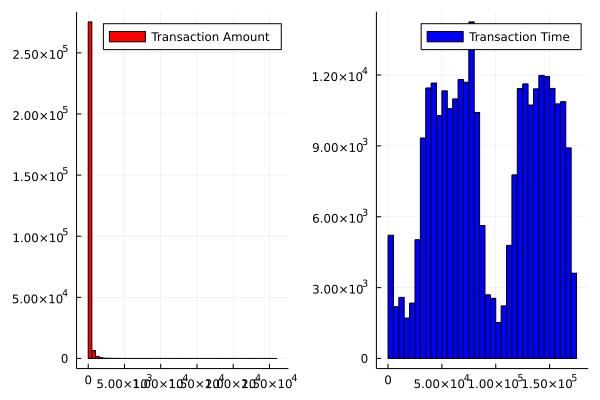

In [33]:
using StatsPlots


plot(
    histogram(df.Amount, bins=50, c=:red, label="Transaction Amount"),
    histogram(df.Time, bins=50, c=:blue, label="Transaction Time")
)

## References

* Installing Julia on Ubuntu
https://medium.com/coffee-in-a-klein-bottle/install-julia-1-5-on-ubuntu-bb8be4b2571d

* [Solved] jupyter-lab: command not found on Ubuntu
https://ashley-tharp.medium.com/solved-jupyter-lab-command-not-found-on-ubuntu-820d5e97510d